In [93]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import missingno


import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [94]:
df=pd.read_csv('D:/Dataset/DF_FULL.csv')
df_clean=pd.read_csv('D:/Dataset/dc_property_clean.csv')

df_clean['SALEDATE']=pd.to_datetime(df_clean['SALEDATE'])
df_clean['YEAR_SALE']=df_clean['SALEDATE'].dt.year

df_clean_8=df_clean[df_clean['YEAR_SALE']>=2010]


### Tipe properti

In [95]:
print(df_clean_8[df_clean_8['SOURCE']=='Residential']['PRICE'].median(),df_clean_8[df_clean_8['SOURCE']=='Condominium']['PRICE'].median())

536295.0 407000.0


Secara umum properti di Washington DC dibagi menjadi 2 jenis, Residential atau perumahan dan Condominium atau apartemen. Harga median dari properti Condominium sebesar \$.407.000 lebih rendah dari Residential dimana harga median dari Residential sebesar \$.536.295. Ada beberapa aspek dan karakteristik yang berpengaruh terhadap harga properti yang akan kita coba analisa.

### Trend harga berdasarkan tahun dan bulan

<Axes: title={'center': 'Trend harga 8 Tahun terakhir'}, xlabel='YEAR_SALE', ylabel='PRICE'>

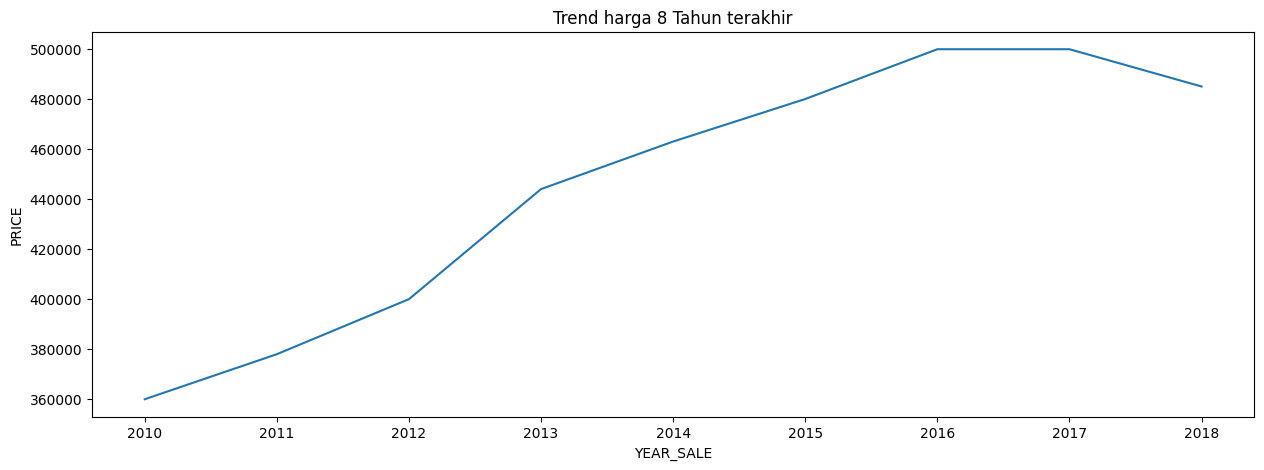

In [96]:
year_med=df_clean_8.groupby(by=df_clean_8['YEAR_SALE'])['PRICE'].median()

plt.figure(figsize=[15,5])
plt.title('Trend harga 8 Tahun terakhir')
sns.lineplot(x=year_med.index,y=year_med)

Harga rumah cenderung mengalami fluktuasi dimana dalam beberapa tahun terakhir terjadi penurunan harga properti. Penurunan harga ini terjadi karena adanya kenaikan suku bunga yang berdampak pada pemangkasan nilai properti seperti apartemen.

Text(0.5, 1.0, 'Trend harga tahun 2017')

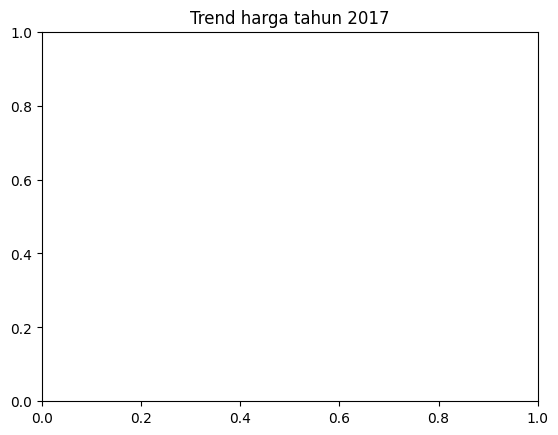

In [97]:
plt.title('Trend harga tahun 2017')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

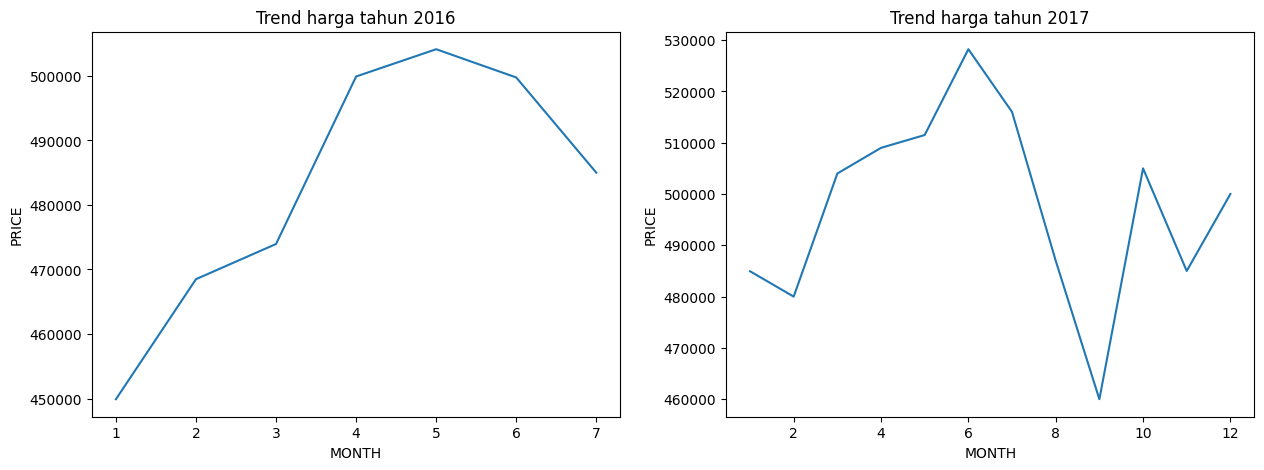

In [98]:
b=df_clean_8[df_clean_8['SALEDATE'].dt.year==2017][['SALEDATE','PRICE']]
b['MONTH']=b['SALEDATE'].dt.month
trend=b.groupby(by=b['MONTH'])['PRICE'].median()

y_2016=df_clean_8[df_clean_8['SALEDATE'].dt.year==2018][['SALEDATE','PRICE']]
y_2016['MONTH']=y_2016['SALEDATE'].dt.month
trend_2016=y_2016.groupby(by=y_2016['MONTH'])['PRICE'].median()

fig, axes= plt.subplots(1,2,figsize=[15,5])

sns.lineplot(ax=axes[0],x=trend_2016.index,y=trend_2016)
axes[0].set_title('Trend harga tahun 2016')

sns.lineplot(ax=axes[1],x=trend.index,y=trend)
axes[1].set_title('Trend harga tahun 2017')

plt.tight_layout

Harga properti cenderung turun saat musim gugur dan musim dingin dimana pada musim ini orang cenderung ingin cepat menjual rumah dan juga permintaan properti pada musim ini cenderung rendah disebabkan faktor cuaca yang menyulitkan mobilitas serta sekolah telah dimulai pada musim gugur, akan tetapi persedian dan pilihan properti pada kedua musim ini. Sedangkan penjual yang tidak punya alasan untuk menjual properti dengan cepat cenderung menunda hingga musim semi dan musim panas karena permintaan properti sangat tinggi pada kedua musim ini sehingga adanya perang penawaran dari konsumen, serta faktor cuaca yang hangat serta sekolah berakhir pada musim semi dan libur hingga musim panas.

Untuk yang memiliki budget rendah bisa membeli properti di musim dingin dan gugur, akam tetapi pilihan yang ada cenderung terbatas. Jika memiliki budget yang lebih banyak dan ingin pilihan yang lebih banyak bisa membeli rumah disaat musim semi dan musim panas.

### Analisis harga berdasarkan lokasi

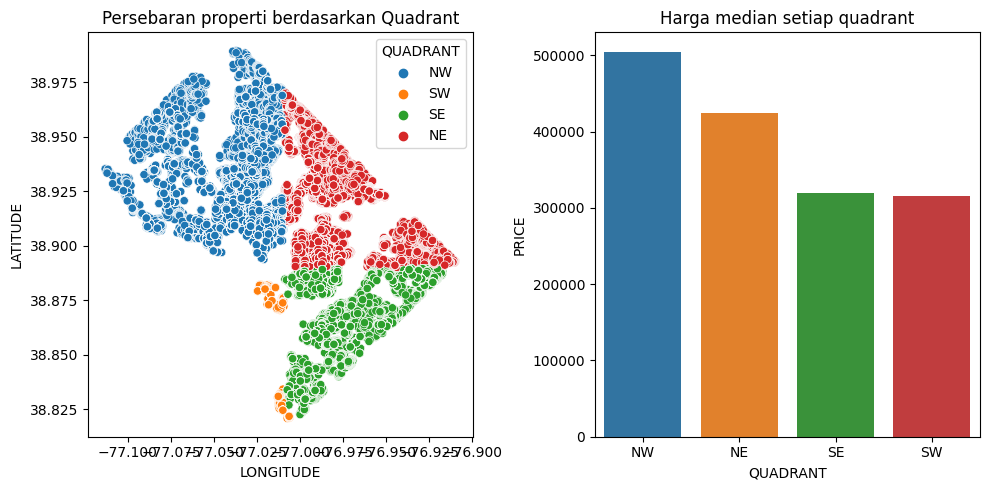

In [99]:
quad_price=df_clean_8.groupby(by=df_clean_8['QUADRANT'])['PRICE'].median()
quad_price.sort_values(inplace=True,ascending=False)

fig, axes= plt.subplots(1,2,figsize=[10,5])

sns.scatterplot(ax=axes[0],x=df_clean_8['LONGITUDE'],y=df_clean_8['LATITUDE'],hue=df_clean_8['QUADRANT'])
axes[0].set_title('Persebaran properti berdasarkan Quadrant')
sns.barplot(ax=axes[1],x=quad_price.index,y=quad_price)
axes[1].set_title('Harga median setiap quadrant')

plt.tight_layout()

In [100]:
quad_price

QUADRANT
NW    505000.0
NE    425000.0
SE    320000.0
SW    315000.0
Name: PRICE, dtype: float64

Berdasarkan quadrant, properti yang terletak di area 'North West' atau barat laut memiliki harga median tertinggi sebesar \$.505.000 dengan properti yang memiliki harga median terendah terletak di area 'South East' atau tenggara Washinton DC sebesar \$.315.000. Sekilas dari barplot juga bisa disimpulkan bahwa area utara Washington DC memiliki harga properti yang lebih tinggi dari area selatan. Akan tetapi melihat harga properti berdasarkan area quadrant masih terlalu dangkal, mari kita lihat lebih detail berdasarkan ward atau daerah administrasi.

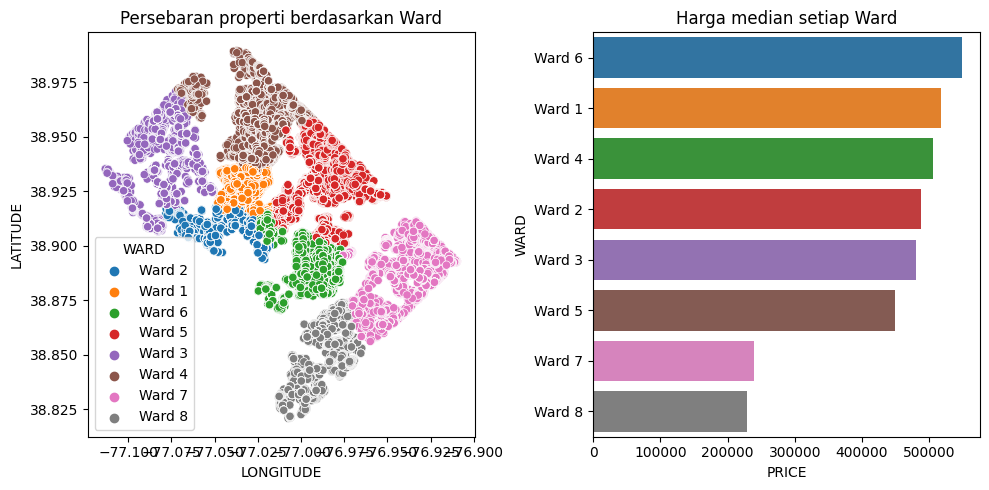

In [101]:
ward_price=df_clean_8.groupby(by=df_clean_8['WARD'])['PRICE'].median()
ward_price.sort_values(inplace=True,ascending=False)

fig, axes= plt.subplots(1,2,figsize=[10,5])

sns.scatterplot(ax=axes[0],x=df_clean_8['LONGITUDE'],y=df_clean_8['LATITUDE'],hue=df_clean_8['WARD'])
axes[0].set_title('Persebaran properti berdasarkan Ward')
sns.barplot(ax=axes[1],x=ward_price,y=ward_price.index,orient='h')
axes[1].set_title('Harga median setiap Ward')

plt.tight_layout()

In [102]:
ward_price

WARD
Ward 6    548000.0
Ward 1    518000.0
Ward 4    505000.0
Ward 2    488000.0
Ward 3    480000.0
Ward 5    449000.0
Ward 7    240000.0
Ward 8    229281.5
Name: PRICE, dtype: float64

Area ward dengan harga median tertinggi adalah ward 6 sebesar \$.548.000 sedangkan yang terendah ialah ward 8 dengan harga median sebesar \$.229.281. Jika dilihat di map, 4 dari 5 ward dengan harga median tertinggi berada di  quadrant North West atau barat laut. Sedangkan ward yang terendah berada di quadrant South East atau tenggara. Hal ini memperkuat dugaan kita sebelumnya. Kemudian mari kita lihat lebih detail lagi dengan memecah area menjadi neighborhood.

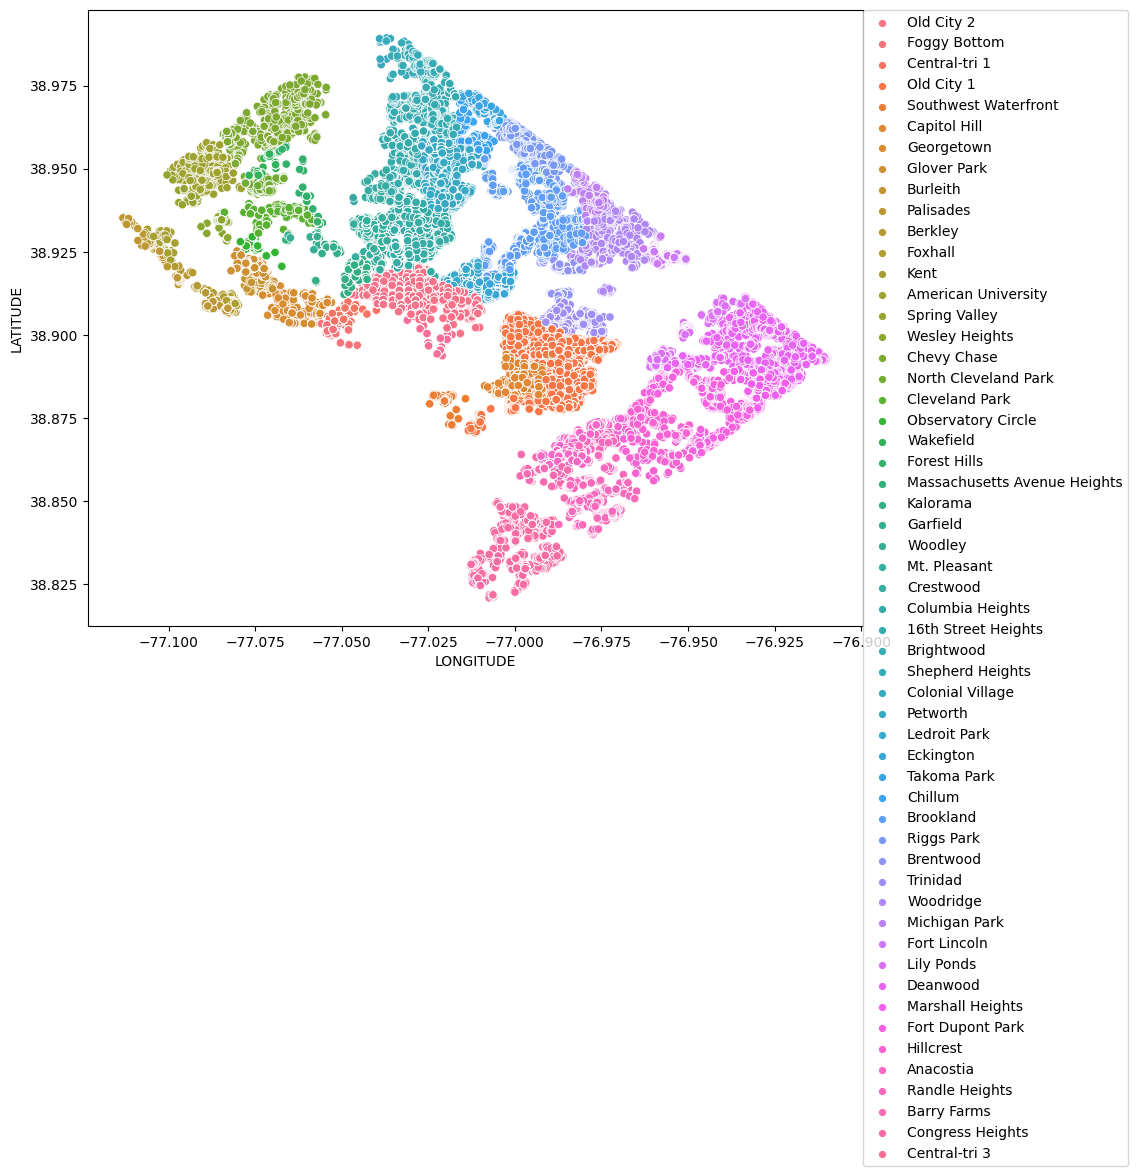

In [103]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_clean_8['LONGITUDE'],y=df_clean_8['LATITUDE'],hue=df_clean_8['ASSESSMENT_NBHD'])

plt.legend(loc=2, bbox_to_anchor=(1, 1), borderaxespad=0., markerscale=0.7)


<Axes: xlabel='PRICE', ylabel='ASSESSMENT_NBHD'>

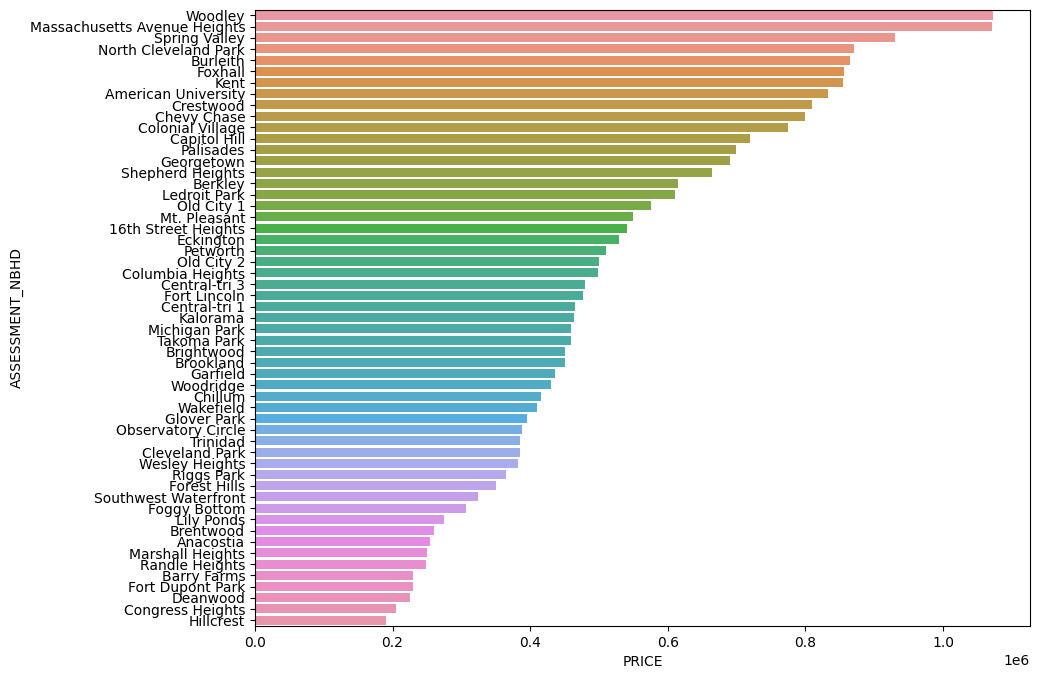

In [104]:
neighborhood_price=df_clean_8.groupby(by=df_clean_8['ASSESSMENT_NBHD'])['PRICE'].median()
neighborhood_price.sort_values(inplace=True,ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=neighborhood_price,y=neighborhood_price.index,orient='h')

In [105]:
neighborhood_price.head()

ASSESSMENT_NBHD
Woodley                         1072500.0
Massachusetts Avenue Heights    1071000.0
Spring Valley                    930000.0
North Cleveland Park             870000.0
Burleith                         864000.0
Name: PRICE, dtype: float64

In [106]:
neighborhood_price.tail()

ASSESSMENT_NBHD
Barry Farms         230000.0
Fort Dupont Park    230000.0
Deanwood            225000.0
Congress Heights    205000.0
Hillcrest           191000.0
Name: PRICE, dtype: float64

Berdasarkan plot di atas, 5 neighborhood dengan harga median tertinggi memiliki kisaran harga > \$.850.000 dengan yang tertinggi yaitu Woodley dengan harga median \$.1.072.500, dimana ke 5 neighborhood ini jika dilihat dari quadrant berada di area North West, dan 5 neighborhood dengan harga median terendah > \$.250.000 dengan yang terendah yaitu Hillcrest dengan harga median sebesar \$.191.000 umumnya berada di area South East. Dari sini kita bisa menginterpretasikan bahwa mungkin saja neighborhood ataupun ward yang berada di area North West merupakan lokasi yang strategis atau dekat dengan pusat kota, memiliki fasilistas umum yang baik serta tingkat kriminalitas yang rendah sedangkan untuk area South East mungkin saja sebaliknya.

Memilih area properti rumah merupakan salah satu pertimbangan penting dalam membeli rumah, jika anda mempunyai budget yang banyak dan mengutamakan fasilitas umum serta keamanan lingkungan mungkin bisa memilih properti di area North West, jika anda punya budget yang sedang bisa mencoba mencari properti di area North East, dan jika budget anda terbatas bisa mencari properti di area South East.

### Harga berdasarkan GBA & Living GBA

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

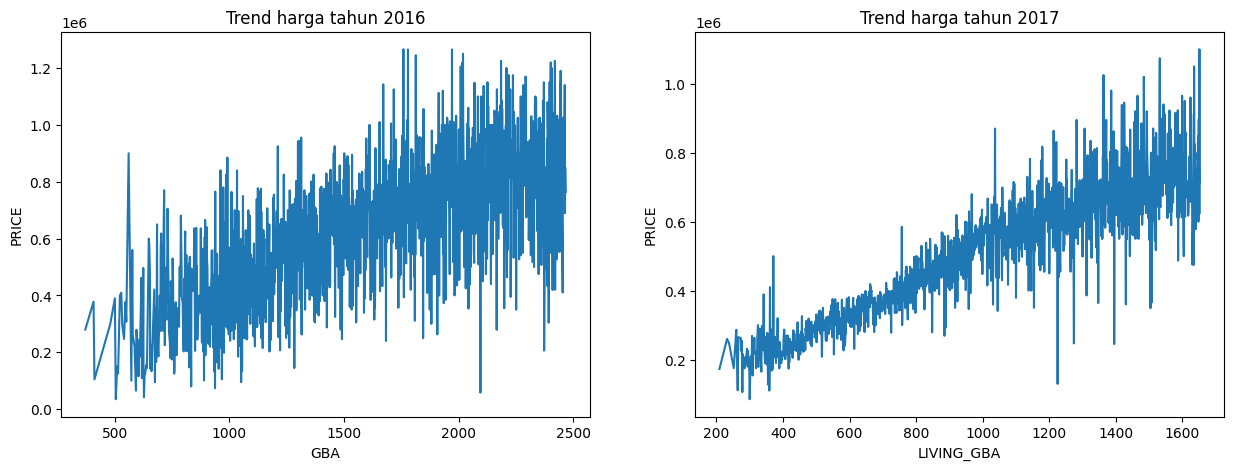

In [107]:
gba=df_clean_8.groupby(by=df_clean_8['GBA'])['PRICE'].median()
livin_gba=df_clean_8.groupby(by=df_clean_8['LIVING_GBA'])['PRICE'].median()

fig, axes= plt.subplots(1,2,figsize=[15,5])

sns.lineplot(ax=axes[0],x=gba.index,y=gba)
axes[0].set_title('Trend harga tahun 2016')

sns.lineplot(ax=axes[1],x=livin_gba.index,y=livin_gba)
axes[1].set_title('Trend harga tahun 2017')

plt.tight_layout

In [108]:
df_clean_8['GBA'].corr(df_clean_8['PRICE'],method='spearman')

0.48119260301355804

In [109]:
df_clean_8['LIVING_GBA'].corr(df_clean_8['PRICE'],method='spearman')

0.6692691920529603

GBA atau Gross Building Area adalah feature yang hanya ada pada properti Residential. Berdasarkan plot dan nilai spearman di atas ada hubungan positif antara GBA dan PRICE dimana semakin besar GBA semakin tinggi harga rumah. Sementara untuk properti condominium ada feature LIVING_GBA dimana dari plot dan nilai spearman ada hubungan positif antara variabel LIVING_GBA dan PRICE.

Oleh karena itu, GBA dan Living GBA bisa menjadi pertimbangan saat membeli rumah dimana jika budget terbatas bisa memilih properti dengan luas GBA atau Living GBA yang kecil, sementara jika memiliki budget lebih dan ingin memiliki area properti yang luas bisa memilih properti dengan luas GBA dan Living GBA yang besar.

### Perbandingan Properti Berdasarkan Jenis dan Lokasi

In [110]:
df_res = df_clean_8[df_clean_8['SOURCE']== 'Residential']
df_con = df_clean_8[df_clean_8['SOURCE']== 'Condominium']

ward = []
ward_prc_mean = []
src =[]
for i in df_res['WARD'].unique():
    mean_res = df_res[df_res['WARD'] == i]['PRICE'].median()
    mean_con = df_con[df_con['WARD'] == i]['PRICE'].median()
    ward.append(i)
    ward_prc_mean.append([mean_res, "Res"])
    ward.append(i)
    ward_prc_mean.append([mean_con, "Con"])

prcmean_ward_src = pd.DataFrame(data= ward_prc_mean, index= ward, columns= ["Prc_mean", 'Property']).sort_index()

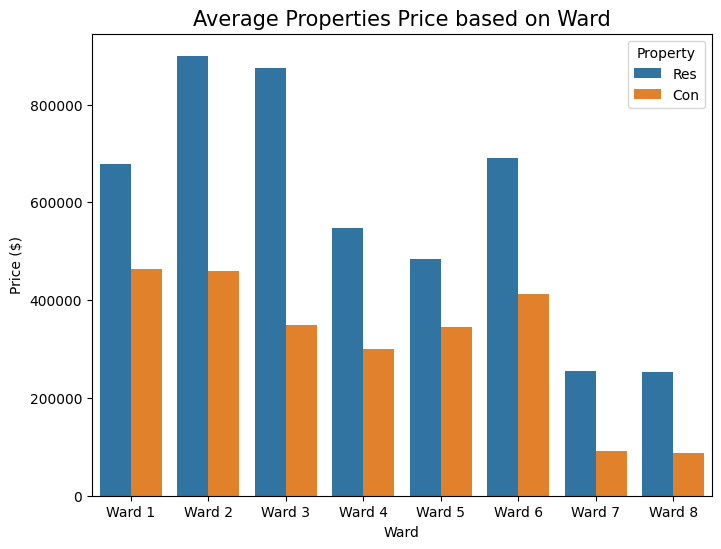

In [111]:
plt.figure(figsize= (8,6))                                          
sns.barplot(x = prcmean_ward_src.index, y= prcmean_ward_src['Prc_mean'], hue= prcmean_ward_src['Property'])
plt.title('Average Properties Price based on Ward', size = 15)   
plt.xlabel('Ward', size = 10)     
plt.ylabel('Price ($)', size = 10)               
plt.show()

Dari hasil analisis didapatkan lokasi dengan harga rata-rata terendah berada pada Ward 8 untuk properti `Residential` dan Ward 7 untuk properti `Condominium`. Disamping itu, harga rata-rata tertinggi berada pada Ward 3 untuk `Residential` dan Ward 1 untuk `Condominium`. <br>
Akan dilakukan perbandingan luas area dan bangunan pada setiap properti untuk mengetahui pengaruh dari luasan terhadap harga.

In [112]:
ward = []
ward_lnar_mean = []
src =[]
for i in df_res['WARD'].unique():
    mean_res = df_res[df_res['WARD'] == i]['LANDAREA'].median()
    mean_con = df_con[df_con['WARD'] == i]['LIVING_GBA'].median()
    ward.append(i)
    ward_lnar_mean.append([mean_res, "Res"])
    ward.append(i)
    ward_lnar_mean.append([mean_con, "Con"])

landmean_ward_src = pd.DataFrame(data= ward_lnar_mean, index= ward, columns= ["Land_mean", 'Property']).sort_index()

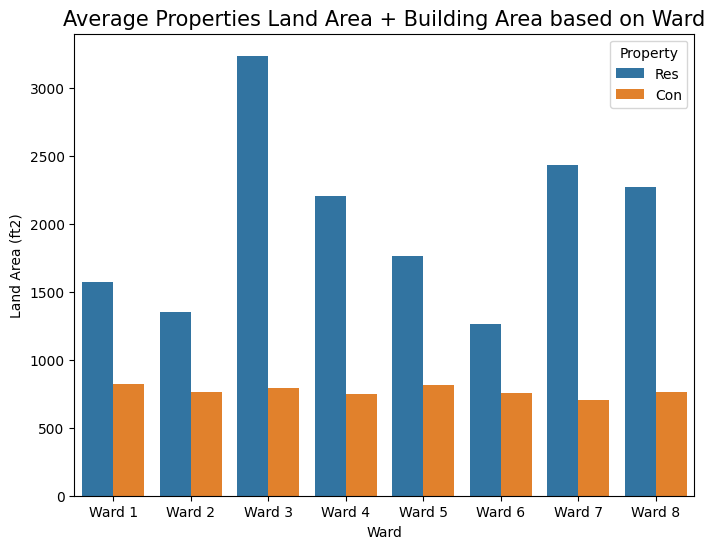

In [113]:
plt.figure(figsize= (8,6))                                          
sns.barplot(x = landmean_ward_src.index, y= landmean_ward_src['Land_mean'], hue= landmean_ward_src['Property'])
plt.title('Average Properties Land Area + Building Area based on Ward', size = 15)   
plt.xlabel('Ward', size = 10)     
plt.ylabel('Land Area (ft2)', size = 10)               
plt.show()

Untuk properti `Residential`, didapatkan bahwa rata-rata luas lahan dan bangunan pada Ward 3 paling tinggi sehingga cukup logis memiliki nilai jual tertinggi. Namun, luas lahan dan bangunan pada Ward 8 bukan yang terendah diantara ward lainnya. <br>
Pada properti `Condominium`, rata-rata luas lahan dan bangunan tertinggi terdapat pada Ward 1 memiliki rata-rata luas lahan dan bangunan yang rendah. Disamping itu, Ward 7 memiliki luas lahan dan bangunan yang cukup tinggi. <br>
Kondisi ini kemungkinan terjadi dikarenakan harga tanah dan bangunan di setiap lokasi, maka akan dianalisis harga pasar per luas tanah dan luas bangunan.

In [114]:
df_res["Prc_per_Landarea"] = df_res["PRICE"]/(df_res["LANDAREA"])
df_con["Prc_per_Landarea"] = df_con["PRICE"]/(df_con["LIVING_GBA"])

In [115]:
ward = []
ward_prar_mean = []
src =[]
for i in df_res['WARD'].unique():
    mean_res = df_res[df_res['WARD'] == i]['Prc_per_Landarea'].median()
    mean_con = df_con[df_con['WARD'] == i]['Prc_per_Landarea'].median()
    ward.append(i)
    ward_prar_mean.append([mean_res, "Res"])
    ward.append(i)
    ward_prar_mean.append([mean_con, "Con"])
plmean_ward_src = pd.DataFrame(data= ward_prar_mean, index= ward, columns= ["PrcLand_mean", 'Property']).sort_index()

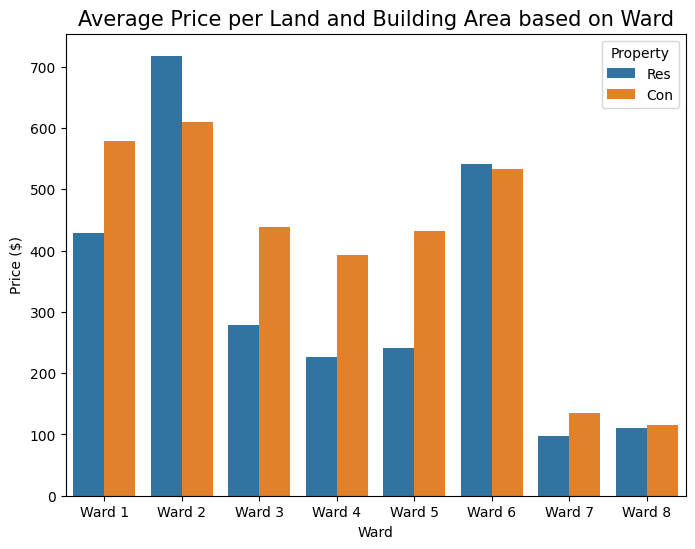

In [116]:
plt.figure(figsize= (8,6))                                          
sns.barplot(x = plmean_ward_src.index, y= plmean_ward_src['PrcLand_mean'], hue= plmean_ward_src['Property'])
plt.title('Average Price per Land and Building Area based on Ward', size = 15)   
plt.xlabel('Ward', size = 10)     
plt.ylabel('Price ($)', size = 10)               
plt.show()

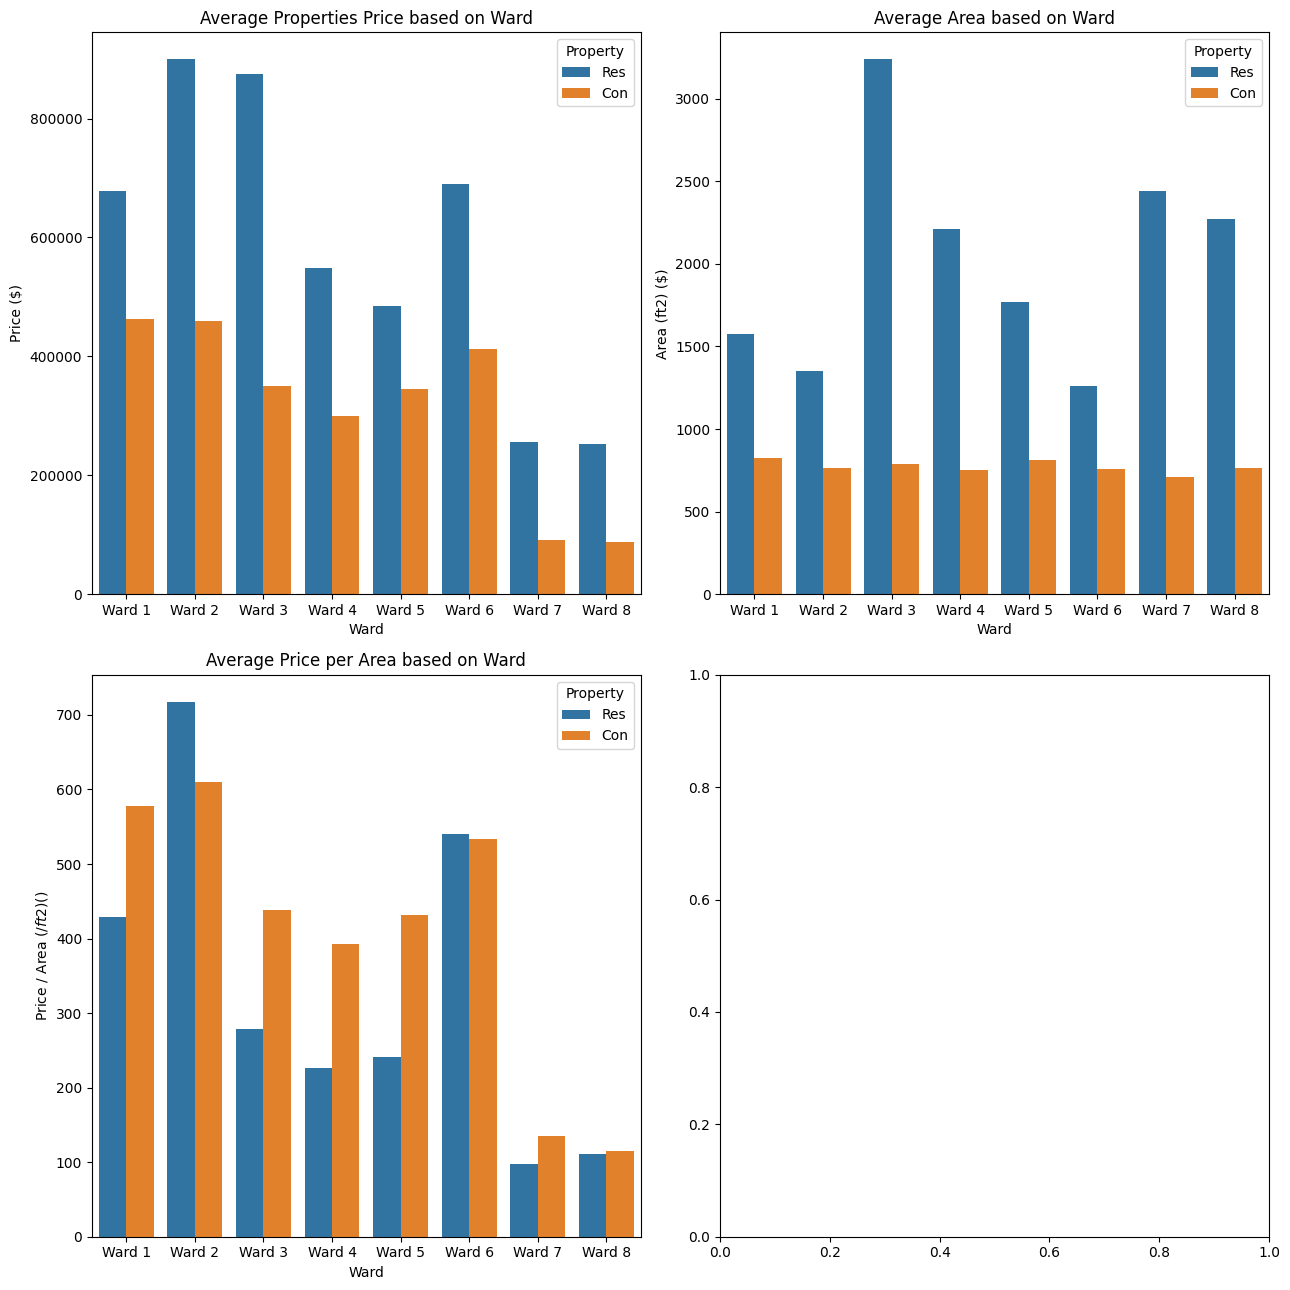

In [117]:
fig, axes= plt.subplots(2,2,figsize=[13,13])

sns.barplot(ax=axes[0,0],x = prcmean_ward_src.index, y= prcmean_ward_src['Prc_mean'], hue= prcmean_ward_src['Property'])
axes[0,0].set_title('Average Properties Price based on Ward')    
axes[0,0].set_xlabel('Ward')     
axes[0,0].set_ylabel('Price ($)')    
                                       
sns.barplot(ax=axes[0,1],x = landmean_ward_src.index, y= landmean_ward_src['Land_mean'], hue= landmean_ward_src['Property'])
axes[0,1].set_title('Average Area based on Ward')    
axes[0,1].set_xlabel('Ward')     
axes[0,1].set_ylabel('Area (ft2) ($)')              

sns.barplot(ax=axes[1,0],x = plmean_ward_src.index, y= plmean_ward_src['PrcLand_mean'], hue= plmean_ward_src['Property'])
axes[1,0].set_title('Average Price per Area based on Ward')     
axes[1,0].set_xlabel('Ward')     
axes[1,0].set_ylabel('Price / Area ($/ft2) ($)')

plt.tight_layout()

Untuk properti `Resindential` harga rata-rata Ward 3 sangat tinggi diakibatkan oleh rata-rata luas total dibandingkan harga per luasan. Di sisi lain, untuk properti `Condominium` harga rata-rata yang tinggi memang diakibatkan rata-rata harga per luas total yang tinggi serta luas total yang sedang. <br>
Calon pembeli perlu mengetahui mengenai Ward 2 yang memiliki rata-rata harga per luas total tertinggi dikarenakan daerah ini sangat dekat dengan banyak destinasi turis dimana salah satunya adalah White House sebagai pusat pemerintahan USA. Untuk Ward 6, daerah ini cukup dekat dengan banyak fasilitas umum serta pertokoan. Daerah Ward 1 merupakan daerah residence yang cukup tua dengan sejarah yang panjang. <br>
Ward 7 dan Ward 8 merupakan daerah urban yang berada di pinggiran kota dan dekat dengan daerah hijau terbuka. Kondisi ini yang menyebabkan daerah ini memiliki harga properti yang cukup rendah dibandingkan dengan daerah lainnya. <br>
Rata-rata harga properti `Residential` lebih rendah dari properti `Condominium` yang mungkin diakibatkan oleh harga fasilitas di `Condominium` yang jauh lebih tinggi daripada `Residential`. <br>
Sumber Data: [DC Government](https://planning.dc.gov/node/604742)

### Perbandingan Properti Berdasarkan Renovasi

In [118]:
dump=pd.read_csv('D:/Dataset/DF_FULL.csv')
dump['SALEDATE']=pd.to_datetime(df_clean['SALEDATE'])

dump['YEAR_SALE']=df_clean['SALEDATE'].dt.year
dump_8=dump[dump['YEAR_SALE']>=2010]

df_res = dump_8[dump_8['SOURCE']== 'Residential']
df_con = dump_8[dump_8['SOURCE']== 'Condominium']

In [119]:
df_res[df_res["YR_RMDL"] == 1]["PRICE"].median()

510000.0

In [120]:
mean_res = df_res[(df_res['WARD'] == i) & (df_res['YR_RMDL'] == 1)]['PRICE'].median()
mean_con = df_con[(df_con['WARD'] == i) & (df_con['YR_RMDL'] == 1)]['PRICE'].median()
rmdl_ward_src = pd.DataFrame(data= [mean_res, mean_con], index= ["Res", "Con"], columns= ["Prc_mean"]).sort_index()

In [121]:
mean_res = df_res[(df_res['WARD'] == i) & (df_res['YR_RMDL'] == 0)]['PRICE'].median()
mean_con = df_con[(df_con['WARD'] == i) & (df_con['YR_RMDL'] == 0)]['PRICE'].median()
normdl_ward_src = pd.DataFrame(data= [mean_res, mean_con], index= ["Res", "Con"], columns= ["Prc_mean"]).sort_index()

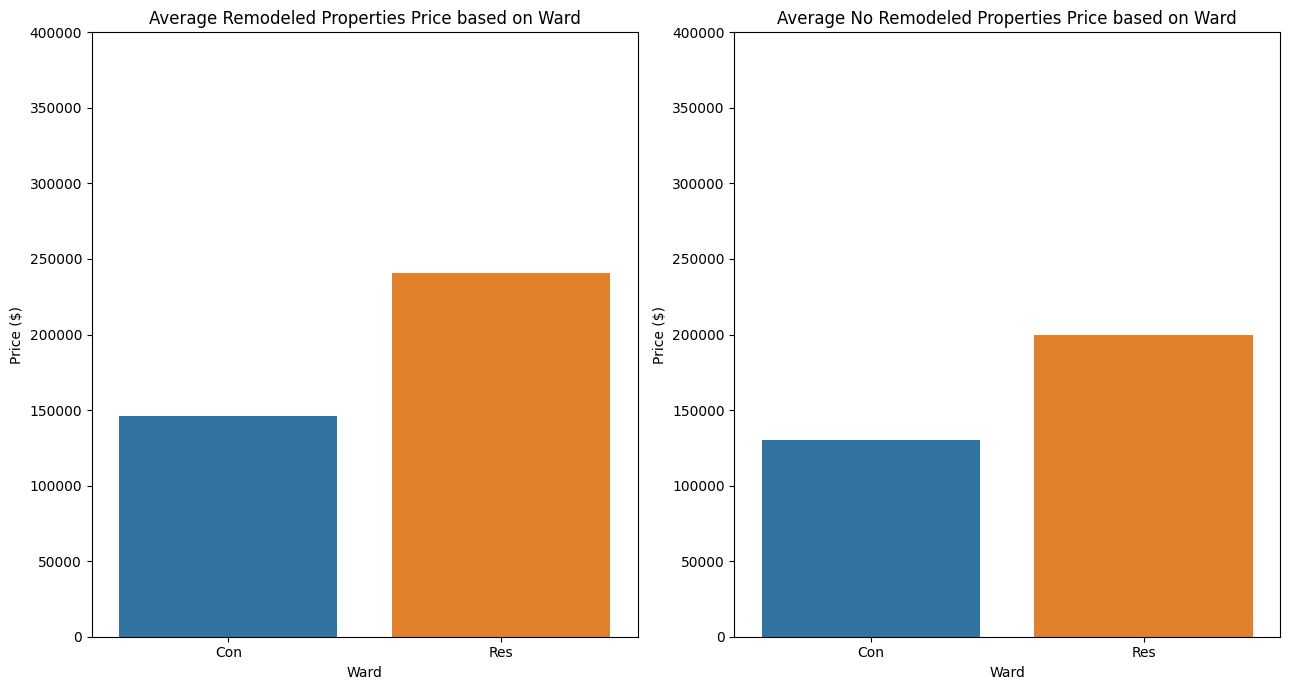

In [122]:
fig, axes= plt.subplots(1,2,figsize=[13,7])

sns.barplot(ax=axes[0],x = rmdl_ward_src.index, y= rmdl_ward_src['Prc_mean'])
axes[0].set_title('Average Remodeled Properties Price based on Ward')    
axes[0].set_xlabel('Ward')     
axes[0].set_ylabel('Price ($)')    
axes[0].set_ylim(0,400000)
                                       
sns.barplot(ax=axes[1],x = normdl_ward_src.index, y= normdl_ward_src['Prc_mean'])
axes[1].set_title('Average No Remodeled Properties Price based on Ward')    
axes[1].set_xlabel('Ward')     
axes[1].set_ylabel('Price ($)')      
axes[1].set_ylim(0,400000)         

plt.tight_layout()

In [123]:
rmdl_ward_src["Prc_mean"] - normdl_ward_src["Prc_mean"]

Con    15900.0
Res    41000.0
Name: Prc_mean, dtype: float64

In [124]:
mean_res = 2023 - df_res[(df_res['WARD'] == i) & (df_res['YR_RMDL'] == 1)]['EYB'].median()
mean_con = 2023 - df_con[(df_con['WARD'] == i) & (df_con['YR_RMDL'] == 1)]['EYB'].median()
rmdl_ward_year = pd.DataFrame(data= [mean_res, mean_con], index= ["Res", "Con"], columns= ["Year_mean"]).sort_index()

In [125]:
mean_res = 2023 - df_res[(df_res['WARD'] == i) & (df_res['YR_RMDL'] == 0)]['EYB'].median()
mean_con = 2023 - df_con[(df_con['WARD'] == i) & (df_con['YR_RMDL'] == 0)]['EYB'].median()
normdl_ward_year = pd.DataFrame(data= [mean_res, mean_con], index= ["Res", "Con"], columns= ["Year_mean"]).sort_index()

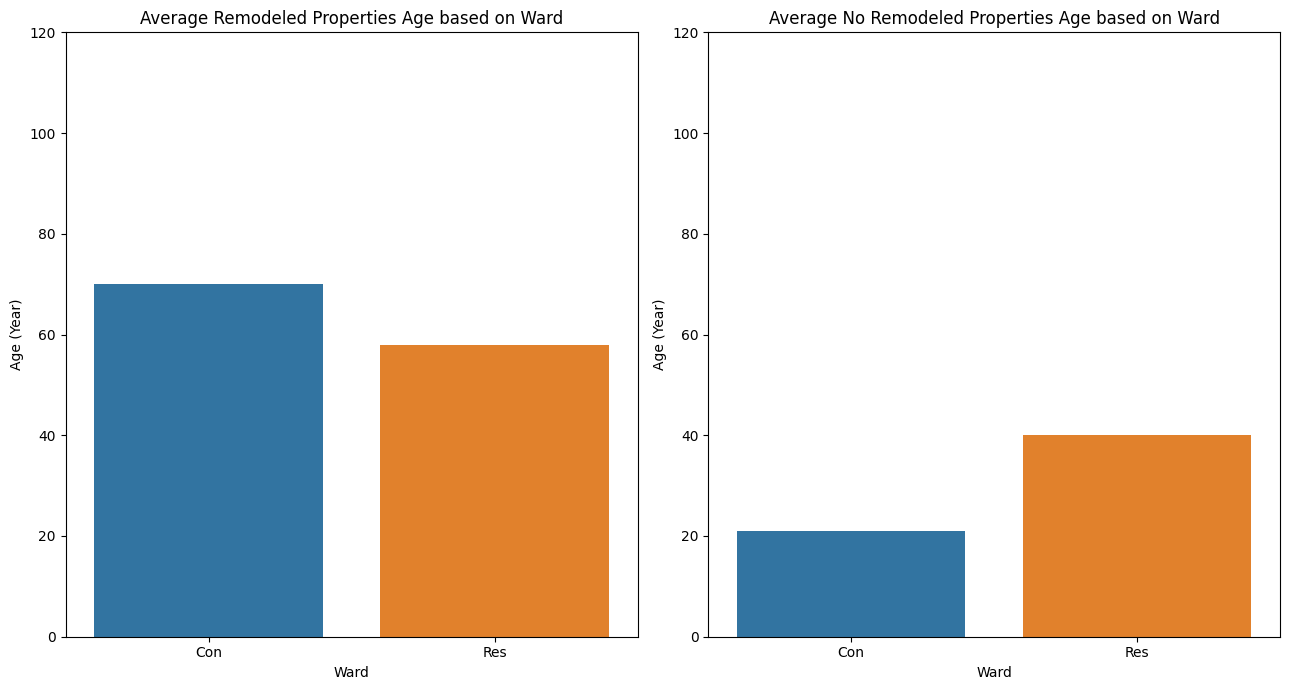

In [126]:
fig, axes= plt.subplots(1,2,figsize=[13,7])

sns.barplot(ax=axes[0],x = rmdl_ward_year.index, y= rmdl_ward_year['Year_mean'])
axes[0].set_title('Average Remodeled Properties Age based on Ward')    
axes[0].set_xlabel('Ward')     
axes[0].set_ylabel('Age (Year)')    
axes[0].set_ylim(0,120)
                                       
sns.barplot(ax=axes[1],x = normdl_ward_year.index, y= normdl_ward_year['Year_mean'])
axes[1].set_title('Average No Remodeled Properties Age based on Ward')    
axes[1].set_xlabel('Ward')     
axes[1].set_ylabel('Age (Year)')      
axes[1].set_ylim(0,120)         

plt.tight_layout()

In [127]:
rmdl_ward_year["Year_mean"] - normdl_ward_year["Year_mean"]

Con    49.0
Res    18.0
Name: Year_mean, dtype: float64

Pada keseluruhan ward, properti `Residential` perbandingan rata-rata harga properti yang direnovasi lebih tinggi dari rata-rata harga properti yang belum direnovasi. Namun, pada properti `Condominium`, rata-rata harga properti yang sudah direnovasi sebagaian besar lebih rendah daripada properti yang belum direnovasi. Hal ini cukup lumrah dikarenakan properti `Condominium` yang sudah direnovasi memiliki umur yang bangunan yang cukup tinggi, sehingga mengurangi umur pakai properti. <br>
Disarankan pada calon pembeli untuk mlebih memantau umur properti terutama pada `Condominium` dikarenakan umur pakai bangunan hanya  mencapai batas rata-rata 100 tahun.

### Harga berdasarkan jumlah ruangan

Selanjutnya mari kita lihat perbandingan harga dari segi karakteristik yang dimiliki oleh rumah

<Axes: xlabel='PRICE', ylabel='ROOMS'>

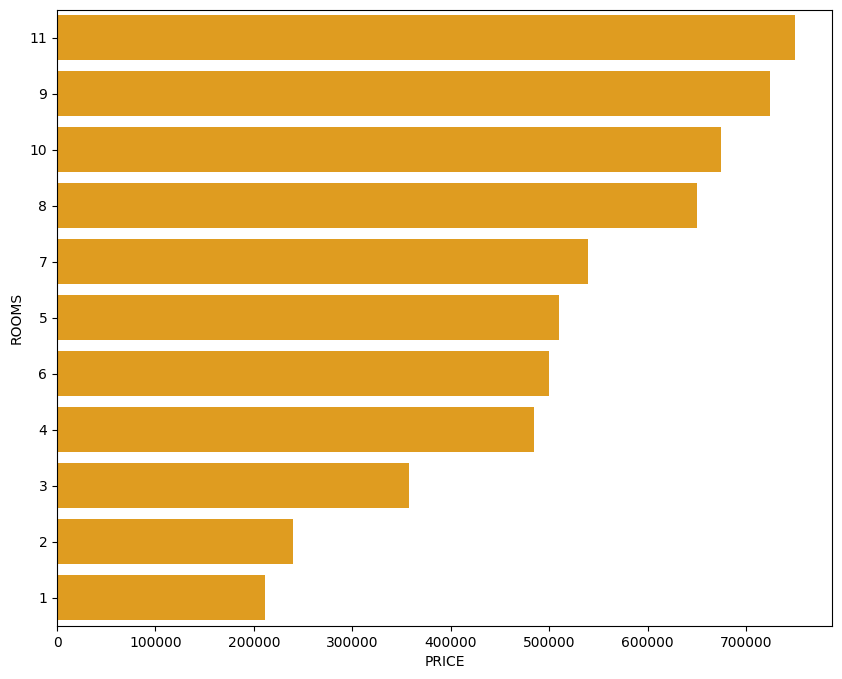

In [128]:
rooms_price=df_clean_8.groupby(by=df_clean_8['ROOMS'])['PRICE'].median()
rooms_price.sort_values(inplace=True,ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=rooms_price,y=rooms_price.index,orient='h',order=rooms_price.index,color='orange')

In [129]:
rooms_price

ROOMS
11    750000.0
9     724700.0
10    675000.0
8     650000.0
7     540000.0
5     510000.0
6     500000.0
4     485000.0
3     358000.0
2     240000.0
1     211200.0
Name: PRICE, dtype: float64

In [130]:
df_clean_8['ROOMS'].corr(df_clean_8['PRICE'],method='spearman')

0.38327404369065166

Dari jumlah ruangan seperti kamar tidur, kamar mandi dalam satu properti ada kecenderungan semakin banyak jumlah ruangan semakin tinggi pula harga properti. Hal ini juga dipastikan dari nilai Spearman sebesar 0.38 dimana ada hubungan positif antara jumlah ruangan dan harga rumah.

Walaupun pengaruhnya cukup kecil, bagi pembeli rumah jumlah ruangan mungkin bisa menjadi salah satu hal yang bisa dipertimbangakan, selain karena lebih banyak ruangan artinya luas rumah menjadi besar sehingga membuat harga rumah menjadi naik pula. Pembeli rumah mungkin bisa menyesuaikan ini dengan kebutuhan dan budget yang ada.

### Material rumah

<Axes: xlabel='PRICE', ylabel='EXTWALL'>

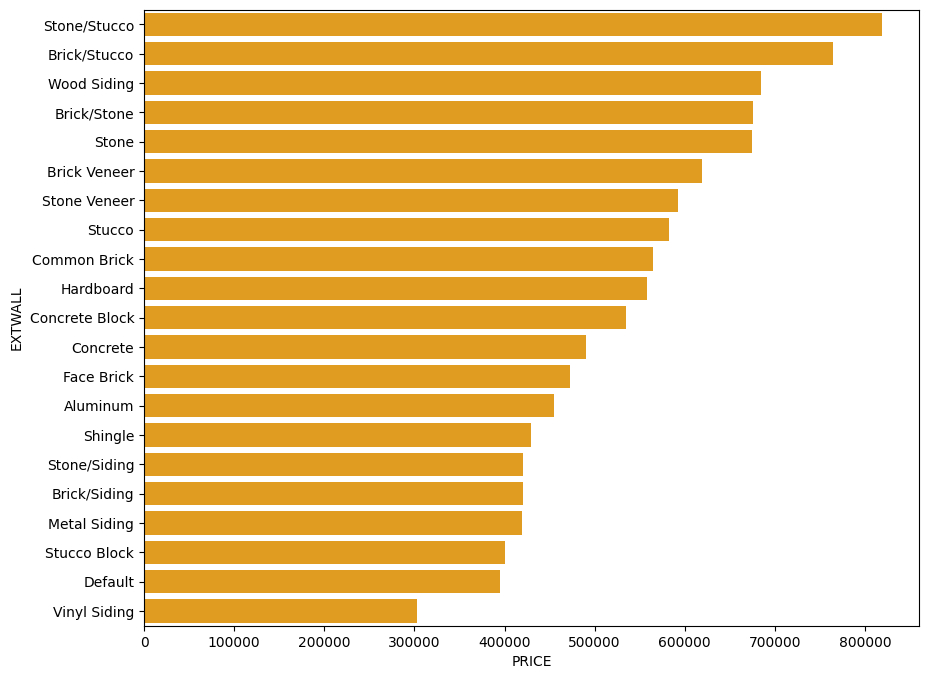

In [131]:
ext_price=df_clean_8.groupby(by=df_clean_8['EXTWALL'])['PRICE'].median()
ext_price.sort_values(inplace=True,ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=ext_price,y=ext_price.index,orient='h',order=ext_price.index,color='orange')

Dari plot di atas, rumah dengan dinding yang terbuat stone/stucco dan brick/stucco memiliki harga yang tinggi karena material ini menggunakan bahan batu dan stucco yang cukup kompleks dan serta tahan lama. Sedangkan rumah dengan material vinyl siding memiliki harga yang murah.

<Axes: xlabel='PRICE', ylabel='ROOF'>

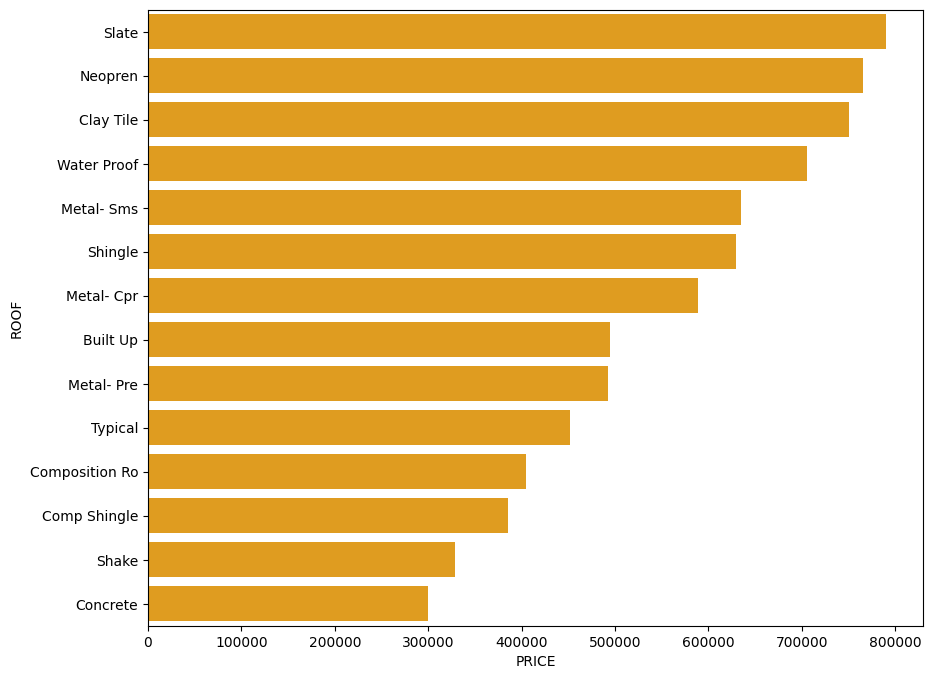

In [132]:
roof_price=df_clean_8.groupby(by=df_clean_8['ROOF'])['PRICE'].median()
roof_price.sort_values(inplace=True,ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=roof_price,y=roof_price.index,orient='h',order=roof_price.index,color='orange')

Berdasarkan plot di atas, rumah dengan atap tipe slate, neopren, dan clay tile memiliki harga yang tinggi karena bahan serta ketahanan tipe atap. Sedangkan rumah dengan tipe atap concrete dan shake memilki harga yang cukup terjangkau mungkin karena bahannya mudah didapatkan dan pemeliharaanya cukup mudah. Untuk pembeli yang menginginkan material seperti Slate, neopren dan clay tile harus mempersiap budget yang lebih untuk mendapatkan properti dengan tipe atap tersebut, akan tetapi jika budget anda terbatas dan tidak terlalu mementingkan tipe atap bisa memilih properti yang menggunakan tipe atap concrete ataupun shake.

<Axes: xlabel='PRICE', ylabel='INTWALL'>

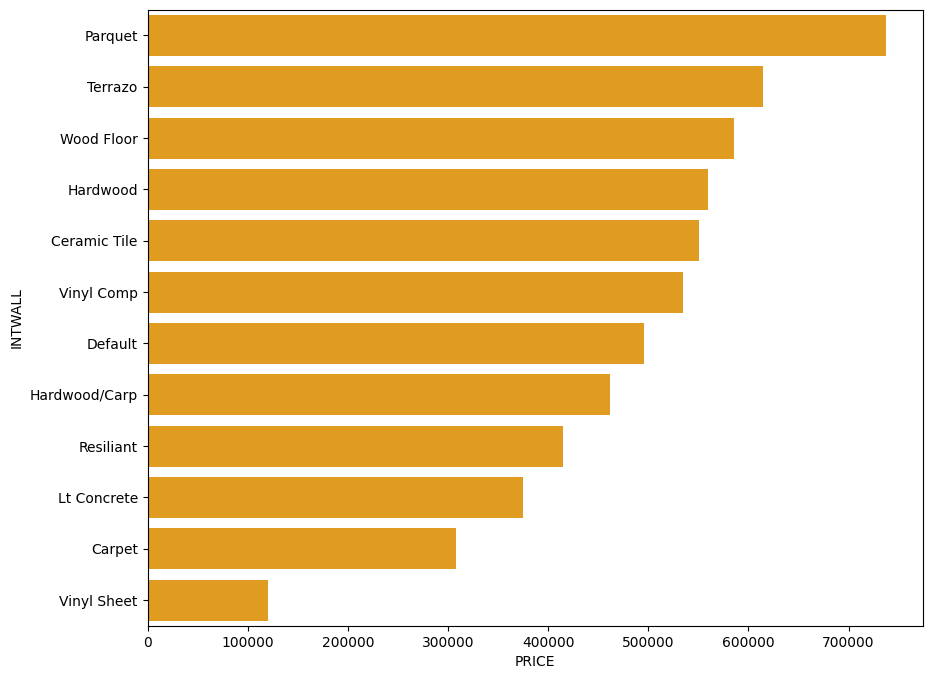

In [133]:
int_price=df_clean_8.groupby(by=df_clean_8['INTWALL'])['PRICE'].median()
int_price.sort_values(inplace=True,ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=int_price,y=int_price.index,orient='h',order=int_price.index,color='orange')

Dari segi lantai, kami mendapatkan insight bahwa rumah dengan lantai yang menggunakan jenis parquet, terazzo, dan wood floor lebih mahal dibandingkan material lainnya. Hal ini karena bahan dari parquet dan wood floor terbuat dari kayu serta membutuhka profesional untuk menyusunnya atau terazzo yang bahan pembuatannya cukup banyak serta pemasangannya yang cukup mahal. Adapun material seperti vinyl sheet, carpet, serta concrete menjadi yang termurah di karenakan bahan dan pemasangannya yang mudah dan cukup murah.

Bagi pembeli yang mengutamakan estetika serta memiliki budget lebih bisa memilih rumah dengan lantai seperti parquet, terazzo, dan wood floor. Akan tetapi jika pembeli memiliki budget yang terbatas dan ingin properti yang nyaman bisa memilih rumah dengan lantai vinyl sheet, carpet, atau concrete.

### Struktur rumah

<Axes: xlabel='PRICE', ylabel='STRUCT'>

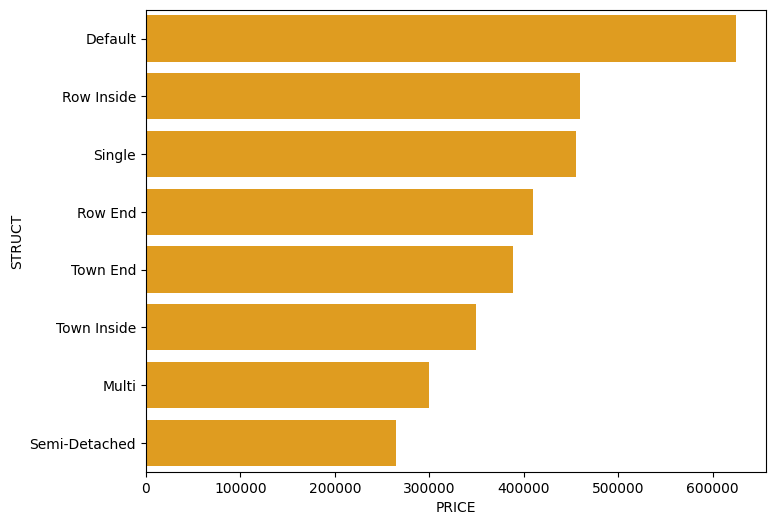

In [134]:
struct_price=df_res.groupby(by=df_res['STRUCT'])['PRICE'].median()
struct_price.sort_values(inplace=True,ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=struct_price,y=struct_price.index,orient='h',order=struct_price.index,color='orange')

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

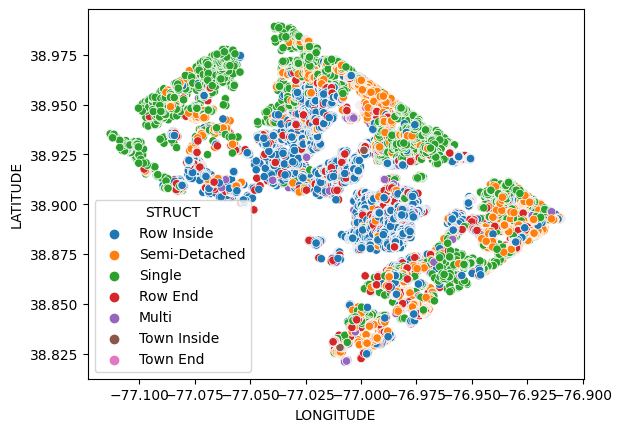

In [135]:
sns.scatterplot(x=df_clean_8['LONGITUDE'],y=df_clean_8['LATITUDE'],hue=df_clean_8['STRUCT'])

Dari insight di atas, didapatkan informasi bahwa rumah dengan struktur Row memiliki harga yang tinggi karena umumnya rumah ini terletak dekat dengan pusat kota sehingga dari segi fasilitas umum juga menjadi poin yang dapat meningkatkan harga rumah jenis ini. Sementara rumah dengan jenis semi-detached memiliki harga yang murah selain karena banyak terletak di pinggir kota juga karena rumah jenis ini berbagi tanah dan bangunan dengan rumah disebelahnya.

Bagi pembeli yang punya budget lebih dan ingin memiliki properti yang dekat dengan pusat kota ataupun ingin berinvestasi mungkin bisa memilih properti jenis ini, atau jika ingin properti yang tanah dan bangunanya tidak menempel dan berbagi bisa memilih jenis single. Jika pembeli memiliki budget terbatas mungkin bisa memilih properti jenis semi-detached dan multi yang tanah dan bangunannya berbagi dengan penghuni lain.